In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import plotly.tools as tls
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)


### I will continue to analyze the dataset last week,whcih contains all the crowd funding projects on kickstarter since 2018.
### In the last homework, I've already made a general analysis. I discusssed the the success rate distribution and the most successful projects categories.

### In this homework, I'll focus on the more detailed analysis about other variable. And hopefully, I can find out the reason why they are more easy to succeed in fundraising.
---
#### Firstly, we just have some basic understanding about the dataset

In [9]:
df_kick=pd.read_csv("./ks-projects.csv")
df_kick=df_kick.sample(10000,random_state=42).reset_index().drop('index',axis=1)

def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

resumetable(df_kick)

Dataset Shape: (10000, 15)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,ID,int64,0,10000,1576537356,675907016,361890770,13.29
1,name,object,0,9999,Deko,"Westside BJ's: The Gluten-Free, Organic Food T...",Crepe Diem Food Truck,13.29
2,category,object,0,158,Hardware,Food Trucks,Food,6.24
3,main_category,object,0,15,Technology,Food,Food,3.57
4,currency,object,0,14,USD,USD,USD,1.27
5,deadline,object,0,2617,2015-10-24,2015-02-01,2014-01-17,11.06
6,goal,float64,0,779,70000,250000,30000,6.50
7,launched,object,0,10000,2015-09-24 03:12:52,2015-01-02 20:55:07,2013-12-18 03:26:04,13.29
8,pledged,float64,0,4601,1888,1466,5723,10.16
9,state,object,0,6,failed,failed,failed,1.52


In [6]:
df_kick.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1576537356,Deko,Hardware,Technology,USD,2015-10-24,70000.0,2015-09-24 03:12:52,1888.0,failed,41,US,1888.00,1888.00,70000.00
1,675907016,"Westside BJ's: The Gluten-Free, Organic Food T...",Food Trucks,Food,USD,2015-02-01,250000.0,2015-01-02 20:55:07,1466.0,failed,9,US,1466.00,1466.00,250000.00
2,361890770,Crepe Diem Food Truck,Food,Food,USD,2014-01-17,30000.0,2013-12-18 03:26:04,5723.0,failed,90,US,5723.00,5723.00,30000.00
3,1225211551,Season's End - A horror novel ready for public...,Fiction,Publishing,GBP,2016-11-23,5500.0,2016-10-24 15:44:36,25.0,failed,2,GB,23.24,31.09,6839.01
4,2122944289,Colorado City Arizona Restaurant (Canceled),Restaurants,Food,USD,2015-05-13,30000.0,2015-03-14 05:18:34,100.0,canceled,3,US,100.00,100.00,30000.00


----
Then we list out some valuable statistic information about dataset

In [5]:
print("Min Goal and Pledged values")
print(df_kick[["goal", "pledged"]].min())
print("")
print("Mean Goal and Pledged values")
print(round(df_kick[["goal", "pledged"]].mean(),2))
print("")
print("Median Goal and Pledged values")
print(df_kick[["goal", "pledged"]].median())
print("")
print("Max Goal and Pledged values")
print("goal       100000000.0") #If i put the both together give me back log values, 
print("pledged     20338986.27") # so i decide to just show this values
print("dtype: float64")
print("")
print("Std Goal and Pledged values")
print(round(df_kick[["goal", "pledged"]].std(),2))

Min Goal and Pledged values
goal       1.0
pledged    0.0
dtype: float64

Mean Goal and Pledged values
goal       48037.94
pledged    10061.02
dtype: float64

Median Goal and Pledged values
goal       5400.0
pledged     656.0
dtype: float64

Max Goal and Pledged values
goal       100000000.0
pledged     20338986.27
dtype: float64

Std Goal and Pledged values
goal       1315264.22
pledged     109205.70
dtype: float64


---
**From last homework we found out categories that has most number of successful projects are "Film & video" , "Music" and "Game"**

**On the other hand,mcategories that has most number of failed projects are "Film & video" , "Publishin" and "MUsic".
Which maybe confusing,but infact the numer the "Film & vidoe" and "Music" just outnumber others greatly,so they both have the most successful and most failed projects, because they simply have too many projects.**


**However, under the main category, each project still has its category that indicates its project style. So further I will analyze the categories of top 3 successful projets and top 3 failed projets.**  

In [11]:
# Also count suspended and canceled projects as failed.
# df_kick.loc[df_kick.state.isin(['suspended', 'canceled']), 'state'] = 'failed'
df_kick = df_kick.loc[df_kick['state'].isin(['failed','successful'])]

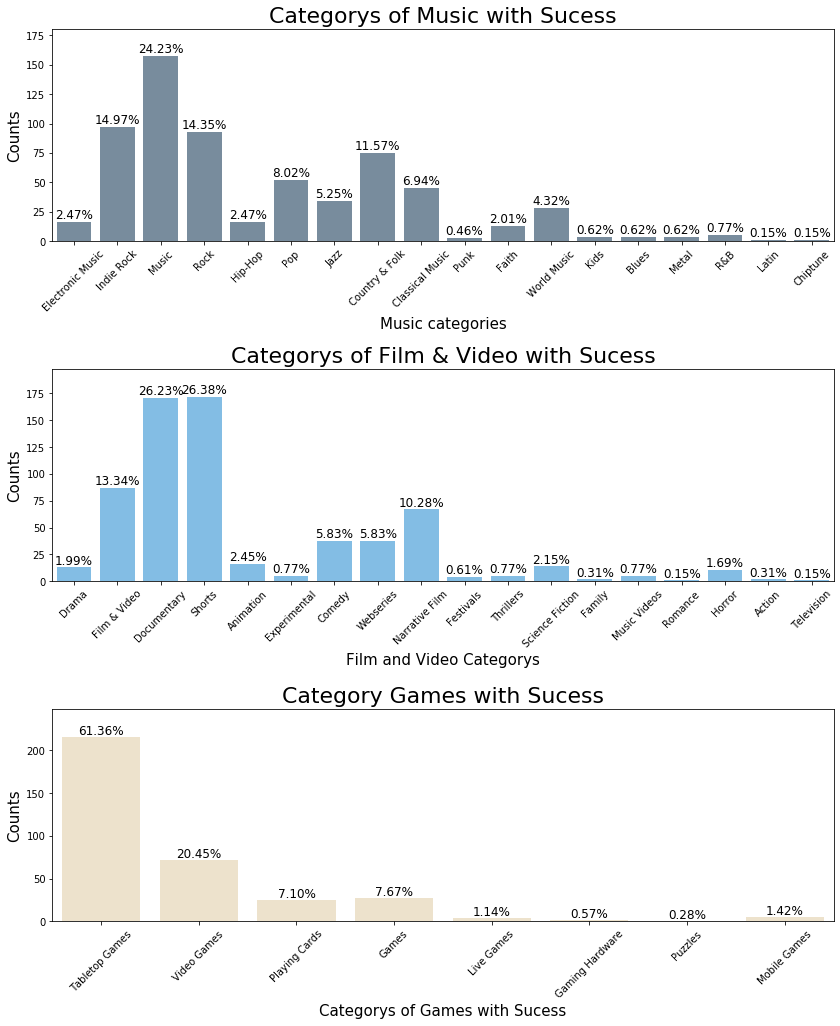

In [17]:
sucess_music = df_kick[(df_kick['main_category'] == 'Music') & 
                      (df_kick['state'] == 'successful')]
sucess_filme_video = df_kick[(df_kick['main_category'] == 'Film & Video') & 
                      (df_kick['state'] == 'successful')]
sucess_games = df_kick[(df_kick['main_category'] == 'Games') & 
                      (df_kick['state'] == 'successful')]

plt.figure(figsize=(14,16))
total = len(df_kick)
plt.subplot(311)
ax0 = sns.countplot(x='category', data=sucess_music,
                    color="#728ca3")
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=45)
ax0.set_title("Categorys of Music with Sucess", fontsize=22)
ax0.set_xlabel("Music categories", fontsize=15)
ax0.set_ylabel("Counts", fontsize=15)
sizes=[]
for p in ax0.patches:
    height = p.get_height()
    sizes.append(height)
    ax0.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(sucess_music)*100),
            ha="center", fontsize=12) 
ax0.set_ylim(0, max(sizes) * 1.15)


plt.subplot(312)
ax1 = sns.countplot(x='category', data=sucess_filme_video,
                    color="#73C0F4")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_title("Categorys of Film & Video with Sucess", fontsize=22)
ax1.set_xlabel("Film and Video Categorys", fontsize=15)
ax1.set_ylabel("Counts", fontsize=15)
sizes=[]
for p in ax1.patches:
    height = p.get_height()
    sizes.append(height)
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(sucess_filme_video)*100),
            ha="center", fontsize=12) 
ax1.set_ylim(0, max(sizes) * 1.15)

plt.subplot(313)
ax2 = sns.countplot(x='category', data=sucess_games,
                    color="#f3e4c6")
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
ax2.set_title("Category Games with Sucess", fontsize=22)
ax2.set_xlabel("Categorys of Games with Sucess", fontsize=15)
ax2.set_ylabel("Counts", fontsize=15)
sizes=[]
for p in ax2.patches:
    height = p.get_height()
    sizes.append(height)
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(sucess_games)*100),
            ha="center", fontsize=12) 
ax2.set_ylim(0, max(sizes) * 1.15)

plt.subplots_adjust(wspace = 0.3, hspace = 0.6,top = 0.9)

plt.show()

### The most successful categories in music are : Indie Rock , Rock ,Country & Folk 
### The most successful categories in Film are : Documentary, Shorts, Narrative Film. 
### The most successful categories Games is basically :Tabletop Games.

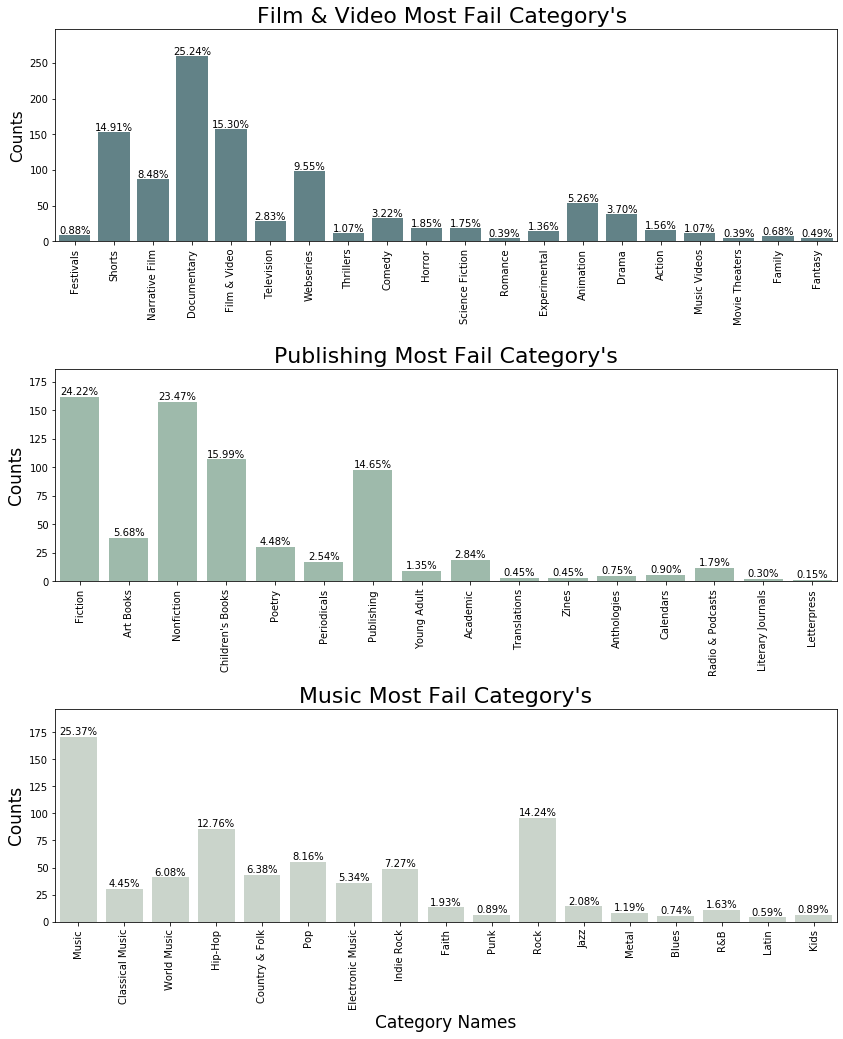

In [13]:
failed_film = df_kick[(df_kick['main_category'] == 'Film & Video') & 
                      (df_kick['state'] == 'failed')]
failed_publishing = df_kick[(df_kick['main_category'] == 'Publishing') & 
                      (df_kick['state'] == 'failed')]
failed_music = df_kick[(df_kick['main_category'] == 'Music') & 
                      (df_kick['state'] == 'failed')]

plt.figure(figsize=(14,16))

plt.subplot(3,1,1)
ax0 = sns.countplot(x='category', data=failed_film, color="#5c868d")
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)
ax0.set_title("Film & Video Most Fail Category's ", fontsize=22)
ax0.set_xlabel("", fontsize=15)
ax0.set_ylabel("Counts", fontsize=15)
sizes=[]
for p in ax0.patches:
    height = p.get_height()
    sizes.append(height)
    ax0.text(p.get_x()+p.get_width()/2.,
            height + 2,
            '{:1.2f}%'.format(height/len(failed_film)*100),
            ha="center", fontsize=10) 
ax0.set_ylim(0, max(sizes) * 1.15)

plt.subplot(3,1,2)
ax1 = sns.countplot(x='category', data=failed_publishing, color="#99bfaa")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_title("Publishing Most Fail Category's", fontsize=22)
ax1.set_xlabel("", fontsize=17)
ax1.set_ylabel("Counts", fontsize=17)
sizes=[]
for p in ax1.patches:
    height = p.get_height()
    sizes.append(height)
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 2,
            '{:1.2f}%'.format(height/len(failed_publishing)*100),
            ha="center", fontsize=10) 
ax1.set_ylim(0, max(sizes) * 1.15)

plt.subplot(3,1,3)
ax2 = sns.countplot(x='category', data=failed_music, 
                    color="#c8d6ca")
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.set_title("Music Most Fail Category's", fontsize=22)
ax2.set_xlabel("Category Names", fontsize=17)
ax2.set_ylabel("Counts", fontsize=17)
sizes=[]
for p in ax2.patches:
    height = p.get_height()
    sizes.append(height)
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 2,
            '{:1.2f}%'.format(height/len(failed_music)*100),
            ha="center", fontsize=10) 
ax2.set_ylim(0, max(sizes) * 1.15)

plt.subplots_adjust(wspace = 0.5, hspace = 0.6,top = 0.9)

plt.show()


### The most failed categories in Film are : Documentary, Shorts.
### The most failed categories in music are : Rock , Hipop
### The most failed categories publishing are : Fiction, Nonfiction, Children's books

Though we can get a rough picture, about which categories are more likely to succeed. But due to the overwhelming number of " "film&video" ,"Music". So we still cannot be sure that categories is the decisive factor.
Next, I will look into time and other feature.

In [15]:
df_kick['launched'] = pd.to_datetime(df_kick['launched'])
df_kick['launched_date'] = df_kick['launched'].dt.date

df_kick['deadline'] = pd.to_datetime(df_kick['deadline'])
df_kick['deadline_date'] = df_kick['deadline'].dt.date

In [16]:
#Creating a new columns with Campaign total months
df_kick['time_campaign_d'] = (df_kick['deadline_date'] - df_kick['launched_date']).dt.days
df_kick['time_campaign_d'] = df_kick['time_campaign_d'].astype(int)

#removing outlier value
df_kick = df_kick[df_kick['time_campaign_d'] != 14867]

df_kick['time_campaign'] = round(df_kick['time_campaign_d'] / 30 )

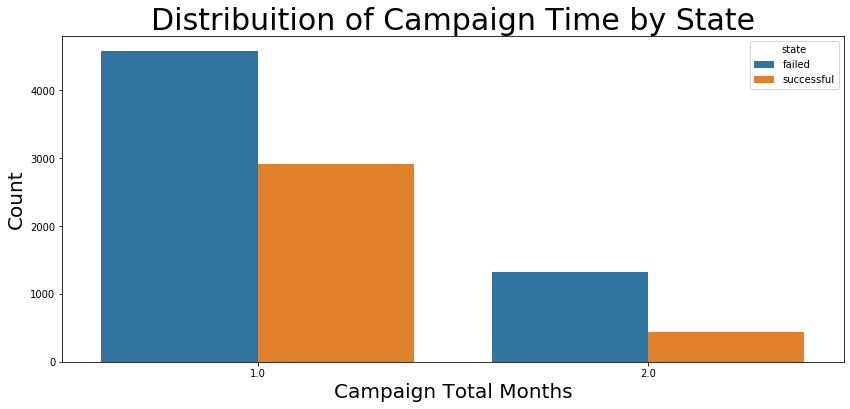

In [17]:
plt.figure(figsize = (14,6))

ax = sns.countplot(x='time_campaign', hue='state', 
                   data=df_kick[(df_kick['time_campaign'] > .7) & 
                                (df_kick['time_campaign'] < 2.1)])
ax.set_title("Distribuition of Campaign Time by State", fontsize=30)
ax.set_xlabel("Campaign Total Months", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.show()

### The most part of projects have 1 month of campaign. We can see that the ratio of successful one month campaigns is better than projects with 1.5 or 2 months of campaign

----

### Launched year distribution

In [18]:
df_kick['laun_month_year'] = df_kick.launched.dt.month
df_kick['laun_year'] = df_kick.launched.dt.year

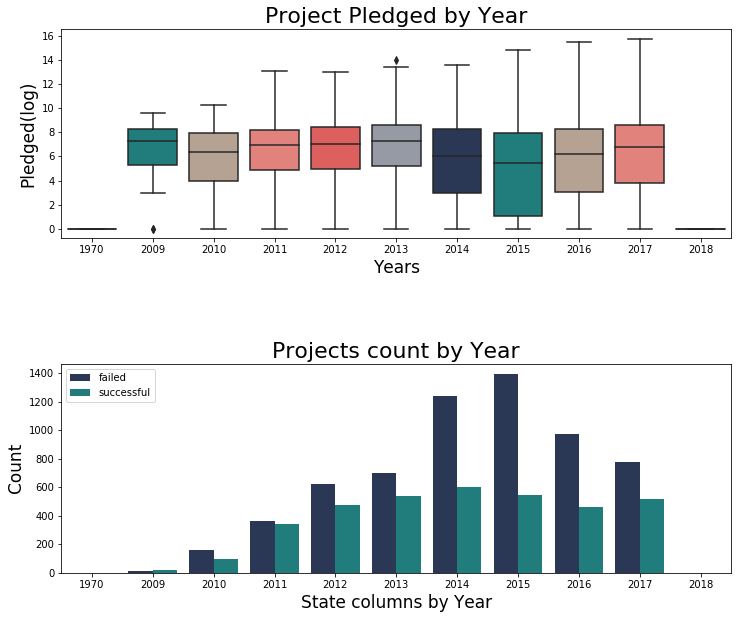

In [42]:
year = df_kick.laun_year.value_counts()
month = df_kick.laun_month_year.value_counts()

df_kick['pledged_log'] = np.log(df_kick['usd_pledged_real'] + 1)
year=year[year[:]>30]
# print(year)

flatui = ["#23345c", "#118c8b", "#bca18d", "#f2746b", "#f14d49", "#9499a6"]
fig, ax = plt.subplots(2,1, figsize=(12,10))

plt.subplot(211)
ax1 = sns.boxplot(x="laun_year", y='pledged_log', 
                  data=df_kick, palette=sns.color_palette(flatui))
ax1.set_title("Project Pledged by Year", fontsize=22)
ax1.set_xlabel("Years", fontsize=17)
ax1.set_ylabel("Pledged(log)", fontsize=17)

plt.subplot(212)
ax2 = sns.countplot(x="laun_year", hue='state', 
                    data=df_kick ,palette=sns.color_palette(flatui))
ax2.set_title("Projects count by Year", fontsize=22)
ax2.set_xlabel("State columns by Year", fontsize=17)
ax2.set_ylabel("Count", fontsize=17)
ax2.legend(loc='upper left')

plt.subplots_adjust(hspace = 0.6)

plt.show()

We can find out that the kickstarter grew rapdily since 2011. Eversince the successful prjects remain approximately 500 to 600.
However we can see that the failed projects skyrocketed.Especially in 2014,2015.  

----
### Launched month distribution

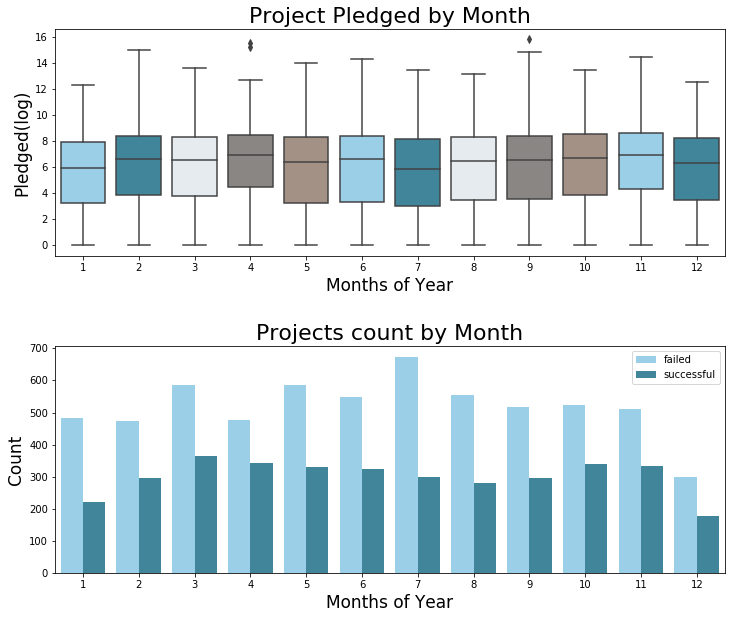

In [49]:
fig, ax = plt.subplots(2,1, figsize=(12,10))

plt.subplot(211)

flatui = ["#8ed3f4","#328daa","#e4ebf2", "#8a8683", "#a7907f"]

ax1 = sns.boxplot(x="laun_month_year", y='pledged_log', 
                  data=df_kick,  palette=sns.color_palette(flatui))
ax1.set_title("Project Pledged by Month", fontsize=22)
ax1.set_xlabel("Months of Year", fontsize=17)
ax1.set_ylabel("Pledged(log)", fontsize=17)

plt.subplot(212)
ax2 = sns.countplot(x="laun_month_year", hue='state', 
                    data=df_kick,palette=sns.color_palette(flatui))
ax2.set_title("Projects count by Month", fontsize=22)
ax2.set_xlabel("Months of Year", fontsize=17)
ax2.set_ylabel("Count", fontsize=17)
ax2.legend(loc='upper right')

plt.subplots_adjust(hspace = 0.4)

plt.show()

**We can note that all months are very similar.**

---
### Then we take a look at the the distribuition of Diff Pledged sucessful and failed Projects


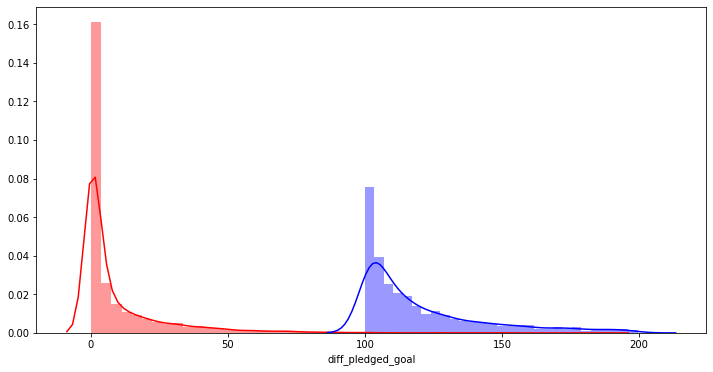

In [52]:
df_kick['diff_pledged_goal'] = round((df_kick['usd_pledged_real'] /df_kick['usd_goal_real']) * 100, 2)
df_kick['diff_pledged_goal'] = df_kick['diff_pledged_goal'].astype(float)

plt.figure(figsize = (12,6))
sns.distplot(df_kick[(df_kick['diff_pledged_goal'] < 200) & 
                     (df_kick['state'] == 'failed')]['diff_pledged_goal'], color='r')
sns.distplot(df_kick[(df_kick['diff_pledged_goal'] < 200) & 
                     (df_kick['state'] == 'successful')]['diff_pledged_goal'],color='b')
plt.show()

## We can easily find that the successful projects have higher number with regard to pledged goal.
---

## Distribution of backers

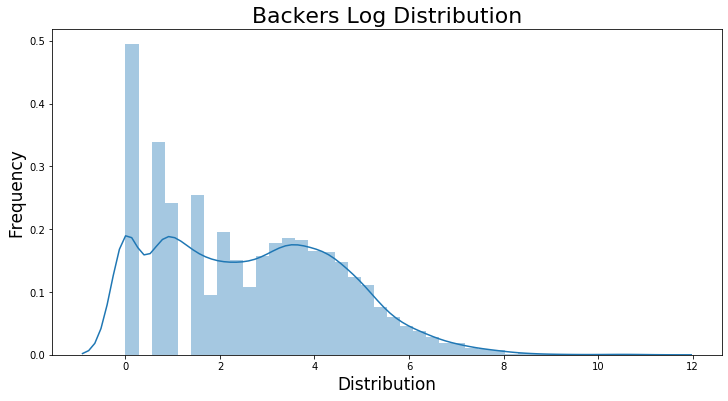

In [53]:
df_kick['backers_log'] = np.log(df_kick['backers'] + 1 ) 
#The + 1 is to normalize the zero or negative values

plt.figure(figsize = (12,6))
g = sns.distplot(df_kick['backers_log'])
g.set_xlabel("Distribution", fontsize=17)
g.set_ylabel("Frequency", fontsize=17)
g.set_title("Backers Log Distribution", fontsize=22)

plt.show()

## Backers by the state

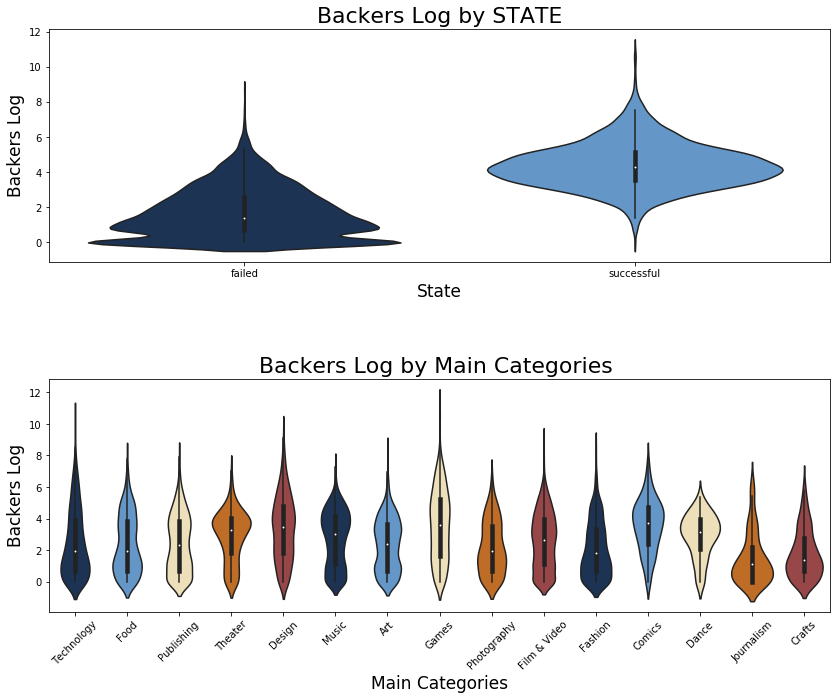

In [60]:
plt.figure(figsize = (14,12))

plt.subplots_adjust(hspace = 0.50, top = 0.8)

flatui=['#14325c','#5398d9','#f4e3b1','#d96b0c','#a53a3b']
plt.subplot(211)

g = sns.violinplot(x='state',y='backers_log', data=df_kick,
                  palette=sns.color_palette(flatui))
g.set_title("Backers Log by STATE", fontsize=22)
g.set_xlabel("State", fontsize=17)
g.set_ylabel("Backers Log", fontsize=17)

plt.subplot(212)
g1 = sns.violinplot(x='main_category',y='backers_log', 
                   palette=sns.color_palette(flatui), data=df_kick)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_title("Backers Log by Main Categories ", fontsize=22)
g1.set_xlabel("Main Categories", fontsize=17)
g1.set_ylabel("Backers Log", fontsize=17)

plt.show()

### We can find for the successful funding, the medeian of backers number is noticeable higher than the failed ones. As for main categories, we can the distribution is quite similar.

### Except for Technology and Games it may occur some extremely high funding, but such situation is rare.

## Backers by the year

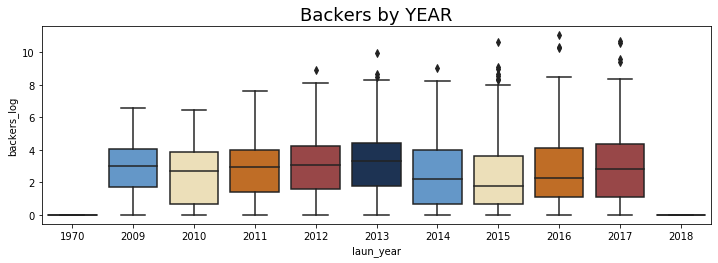

In [64]:
plt.figure(figsize = (12,8))

plt.subplot(211)
g = sns.boxplot(x='laun_year',y='backers_log', 
                palette=sns.color_palette(flatui),
               data=df_kick, 
                order=df_kick['laun_year'].value_counts().index.sort_values().values)
g.set_title("Backers by YEAR", fontsize=18)

plt.show()

---
## Word Cloud
**I found this interesting tool, that can help us to show the word cloud of the dataset. And I will use this tool to show what are the most frequent words that are used in the name of the corwd funding projects.**

In [14]:
from wordcloud import WordCloud, STOPWORDS


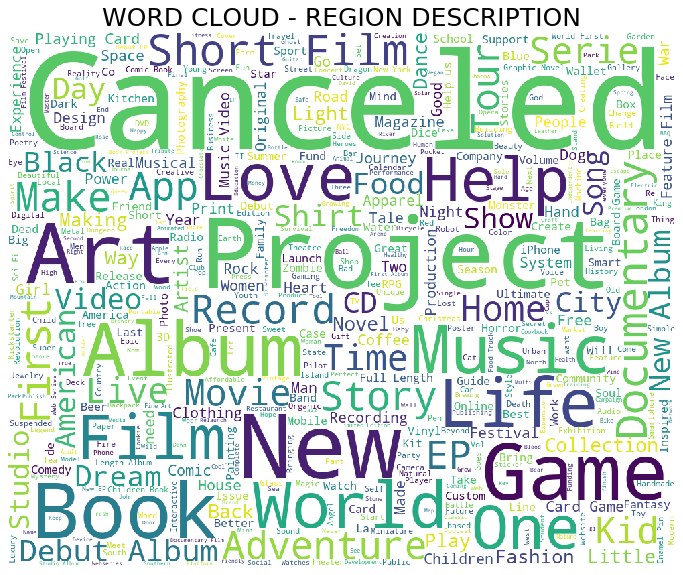

In [17]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=500,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df_kick['name'].dropna().astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)

plt.title("WORD CLOUD - REGION DESCRIPTION",fontsize=25)
plt.axis('off')

plt.show()